In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
train_data = pd.read_csv("C:\\Users\\DELL\\Downloads\\train.csv")
test_data = pd.read_csv("C:\\Users\\DELL\\Downloads\\test.csv")

# Data preprocessing
def preprocess_data(data):
    data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1) # Drop irrelevant columns
    data['Age'].fillna(data['Age'].median(), inplace=True) # Fill missing values in Age column
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) # Fill missing values in Embarked column
    data['Fare'].fillna(data['Fare'].median(), inplace=True) # Fill missing values in Fare column
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}) # Map categorical values to numerical
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Splitting data into features and target variable
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

# Splitting the dataset into the Training set and Test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Accuracy:", accuracy)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\DELL\AppData\Local\Temp\ipykernel_11024\1378934651.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True) # Fill missing values in Age column
C:\Users\DELL\AppData\Local\Temp\ipykernel_11024\1378934651.py:16: FutureWarning: A value is tryi

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6460 - loss: 0.6710 - val_accuracy: 0.7207 - val_loss: 0.5916
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7020 - loss: 0.5915 - val_accuracy: 0.7709 - val_loss: 0.5199
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7420 - loss: 0.5634 - val_accuracy: 0.7765 - val_loss: 0.4734
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7598 - loss: 0.5325 - val_accuracy: 0.7933 - val_loss: 0.4499
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7864 - loss: 0.4890 - val_accuracy: 0.7933 - val_loss: 0.4342
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7550 - loss: 0.5341 - val_accuracy: 0.7989 - val_loss: 0.4286
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8174 - loss: 0.4546 - val_accuracy: 0.8045 - val_loss: 0.4266
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8154 - loss: 0.4454 - val_accuracy: 0.7989 - val_loss

In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [7]:
test_datas=test_data.drop(['PassengerId'],axis=1)

In [8]:
test_datas

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,27.0,0,0,8.0500,0


In [4]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,27.0,0,0,8.0500,0


In [15]:
predictions=model.predict(test_datas)
predictions


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[1.9913422e-01],
       [6.6872291e-02],
       [5.9867684e-02],
       [4.6318278e-01],
       [9.7349286e-01],
       [7.6235533e-01],
       [7.0138365e-01],
       [9.9991649e-01],
       [8.5249764e-01],
       [9.9892437e-01],
       [3.2580149e-01],
       [9.9995375e-01],
       [1.0000000e+00],
       [9.9972939e-01],
       [1.0000000e+00],
       [9.9998713e-01],
       [9.3358463e-01],
       [4.3217990e-01],
       [7.2293329e-01],
       [1.6390152e-01],
       [1.0000000e+00],
       [7.9244860e-02],
       [9.9999893e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.3569703e-01],
       [1.0000000e+00],
       [3.8289553e-01],
       [9.9999481e-01],
       [9.9849308e-01],
       [9.9987751e-01],
       [9.9997246e-01],
       [9.9895936e-01],
       [9.9964541e-01],
       [1.0000000e+00],
       [4.9970615e-01],
       [7.7343208e-01],
       [8.9971679e-01],
       [6.6229993e-01],
       [1.0000000e+00],
       [8.1054503e-01],
       [9.999564

In [18]:
prediction_df=pd.DataFrame(predictions,columns=['predicted'])

In [19]:
prediction_df

,predicted
0,0.199134
1,0.066872
2,0.059868
3,0.463183
4,0.973493
...,...
413,0.352404
414,1.000000
415,0.060972
416,0.352404


In [21]:
test_data['prediction']=prediction_df

In [22]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,prediction
0,892,3,0,34.5,0,0,7.8292,2,0.199134
1,893,3,1,47.0,1,0,7.0000,0,0.066872
2,894,2,0,62.0,0,0,9.6875,2,0.059868
3,895,3,0,27.0,0,0,8.6625,0,0.463183
4,896,3,1,22.0,1,1,12.2875,0,0.973493
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,0,0.352404
414,1306,1,1,39.0,0,0,108.9000,1,1.000000
415,1307,3,0,38.5,0,0,7.2500,0,0.060972
416,1308,3,0,27.0,0,0,8.0500,0,0.352404


In [23]:
prdedicting=test_data[['PassengerId','prediction']]

In [25]:
prdedicting

,PassengerId,prediction
0,892,0.199134
1,893,0.066872
2,894,0.059868
3,895,0.463183
4,896,0.973493
...,...,...
413,1305,0.352404
414,1306,1.000000
415,1307,0.060972
416,1308,0.352404


In [27]:
csv_file_path='prediction.csv'
prdedicting.to_csv(csv_file_path,index=False)
print("prediction saved to:",csv_file_path)

prediction saved to: prediction.csv


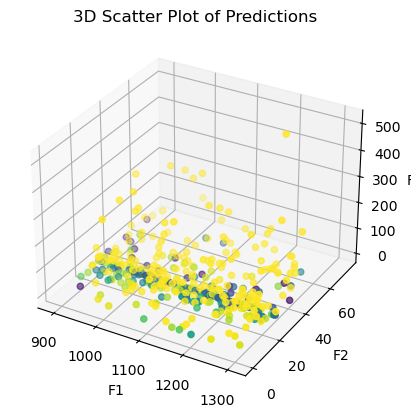

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data' is your dataset with three features and 'predictions' is your array of predictions
# 'data' should have columns for the three features and the prediction results
# For example:
# data = pd.DataFrame({'feature1': feature1_values, 'feature2': feature2_values, 'feature3': feature3_values})

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract features
f1 = test_data['PassengerId']
f2 = test_data['Age']
f3 = test_data['Fare']

# Plot the data points
ax.scatter(f1, f2, f3, c=predictions)

# Set labels and title
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
ax.set_title('3D Scatter Plot of Predictions')

# Show the plot
plt.show()


In [43]:
test_data['prediction']

0      0.199134
1      0.066872
2      0.059868
3      0.463183
4      0.973493
         ...   
413    0.352404
414    1.000000
415    0.060972
416    0.352404
417    0.998297
Name: prediction, Length: 418, dtype: float32

In [45]:
import numpy as np
threshold=0.5
binary_prediction=(test_data['prediction']>=threshold).astype(int)
binary_prediction

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: prediction, Length: 418, dtype: int32

In [47]:
test_data['binary_prediction']=binary_prediction

In [48]:
binary_prediction

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: prediction, Length: 418, dtype: int32

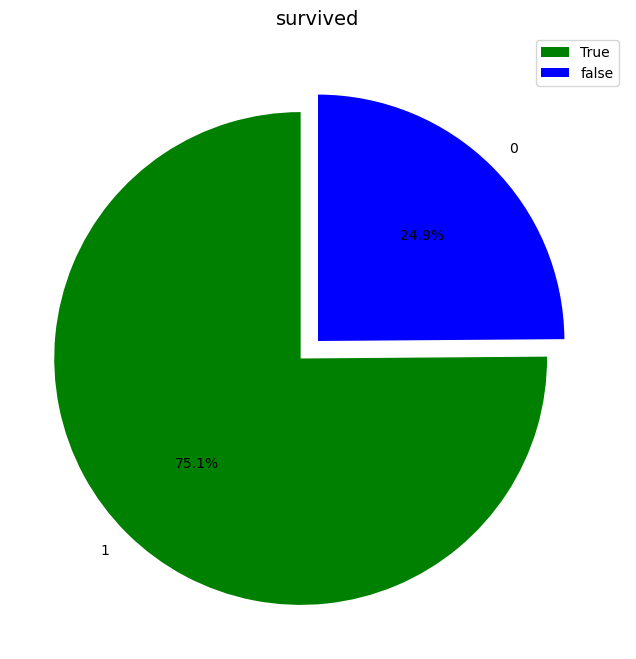

In [54]:
percent=test_data['binary_prediction'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(percent.values,labels=percent.index,autopct='%.1f%%',startangle=90,explode=[0.1,0],colors=['green','blue'])
plt.legend(['True','false'],loc='upper right')
plt.title('survived',fontsize=14)
plt.show()